In [1]:
from main.genome.genome_net import GenotypeNet
from main.genome.base_genome import BaseGenome
from main.config import Config

In [2]:
import torch
import torch.nn as nn

In [3]:
config = Config()

genome1 = BaseGenome(0, config)
net1 = GenotypeNet(genome1, config)

genome2 = BaseGenome(1, config)

child = BaseGenome.crossover(genome1, genome2, 2, config)

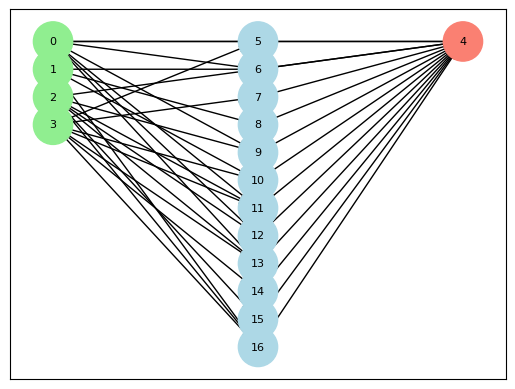

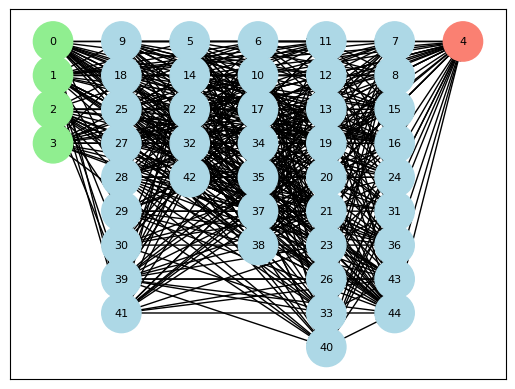

In [4]:
BaseGenome.visualize_genome(genome1)
BaseGenome.visualize_genome(genome2)

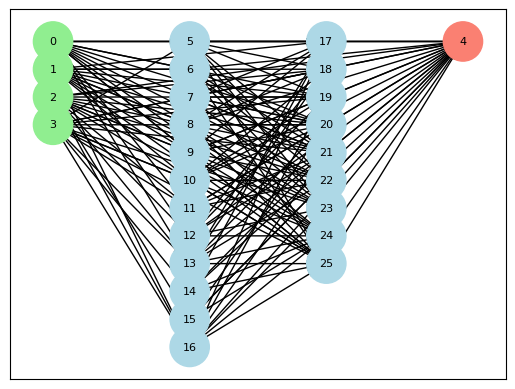

In [5]:
BaseGenome.visualize_genome(child)

In [ ]:
print("Input size: ", config.input_size)
print("Output size: ", config.output_size)

input = torch.rand(3, 4)
target = torch.rand(3, 1)

print("Input: ", input)
print("Target: ", target)

criterion = nn.MSELoss()
optimiser = torch.optim.SGD(net.parameters(), lr=0.01)
for i in range(10):
    optimiser.zero_grad()
    output = net(input)
    loss = criterion(output, target)
    loss.backward()
    optimiser.step()

Input size:  4
Output size:  1
Input:  tensor([[0.7472, 0.5909, 0.2339, 0.8376],
        [0.4751, 0.0811, 0.6139, 0.1423],
        [0.4727, 0.4980, 0.1856, 0.9612]])
Target:  tensor([[0.3003],
        [0.5585],
        [0.7351]])
Output:  tensor([[0.1425],
        [0.0082],
        [0.2546]], grad_fn=<IndexBackward0>)
Loss:  tensor(0.1863, grad_fn=<MseLossBackward0>)
Output:  tensor([[0.1617],
        [0.0229],
        [0.2726]], grad_fn=<IndexBackward0>)
Loss:  tensor(0.1733, grad_fn=<MseLossBackward0>)
Output:  tensor([[0.1799],
        [0.0370],
        [0.2898]], grad_fn=<IndexBackward0>)
Loss:  tensor(0.1616, grad_fn=<MseLossBackward0>)
Output:  tensor([[0.1973],
        [0.0505],
        [0.3062]], grad_fn=<IndexBackward0>)
Loss:  tensor(0.1509, grad_fn=<MseLossBackward0>)
Output:  tensor([[0.2139],
        [0.0634],
        [0.3219]], grad_fn=<IndexBackward0>)
Loss:  tensor(0.1411, grad_fn=<MseLossBackward0>)
Output:  tensor([[0.2296],
        [0.0757],
        [0.3368]], grad_f

In [14]:
net.biases

Parameter containing:
tensor([ 0.0000,  0.0000,  0.0000,  0.0000,  0.0654,  0.0098,  0.0131,  0.0000,
         0.0000, -0.0188, -0.0058,  0.0000], requires_grad=True)